# Introduction
### With our project we have set out to use machine learning algorithms to predict whether or not a patient has Parkinsons disease. This problem is important because Parkinsons is a terrible disease that attacks the central nervous system and people's very ability to move and function independently. While there is no cure yet it is a treatable disease so the sooner it is detected, the better the symptoms can be slowed and alleviated. As Parkinsons affects a person's speech patterns in a variety of ways such as, speaking quietly or in one tone, lack of emotion in voice, or the mumbling and slurring of words, the database we used contains multiple measurements of patients' speech patterns. Therefore, the input to our algorthim is various measurments of patient's speaking patterns. We then use a Decision Tree, Random Forest, and Artifical Neural Network (Multi-Layer Perceptron) to output a prediction of whether or not a patient has Parkinson's disease. 

### The attributes we used are as follows:
### MDVP:Fo(Hz) - Average vocal fundamental frequency
### MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
### MDVP:Flo(Hz) - Minimum vocal fundamental frequency
### MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
### measures of variation in fundamental frequency
### MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
### NHR,HNR - Two measures of ratio of noise to tonal components in the voice
### status - Health status of the subject (one) - Parkinson's, (zero) - healthy
### RPDE,D2 - Two nonlinear dynamical complexity measures
### DFA - Signal fractal scaling exponent
### spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

### Though we did attempt to research what each of these means it got complicated very fast. The general idea is that each one of these attributes from the database, minus name which we removed because it is irrelavent to what we were doing and status which is whether or not the patient had Parkinsons, is an aspect of a persons speech patterns that you can measure from a recording. 

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

#Read in parkinsons data
df=pd.read_csv('parkinsons.csv', sep=',')
#Move the status column and delete the name column
park=df['status']
df=df.drop(columns=['status','name'])
df['status']=park
display(df)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


(array([0, 1]), [Text(0, 0, 'Has Parkinsons'), Text(1, 0, 'Does Not')])

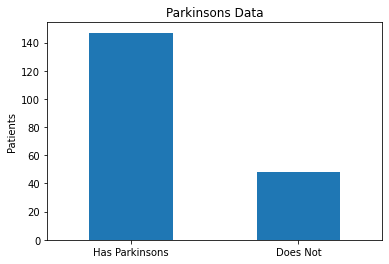

In [2]:
#Barchart showing distribution of parkinsons diagnoses in the data
parkbar=df['status'].value_counts().plot(kind='bar')
parkbar.set_title('Parkinsons Data')
parkbar.set_ylabel('Patients')
parkbar.set_xticklabels(("Has Parkinsons","Does Not"))
plt.xticks(rotation=0)

In [3]:
#Split the data by whether or not they have parkinsons and show the means
group_df=df.groupby('status').mean()
display(group_df)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


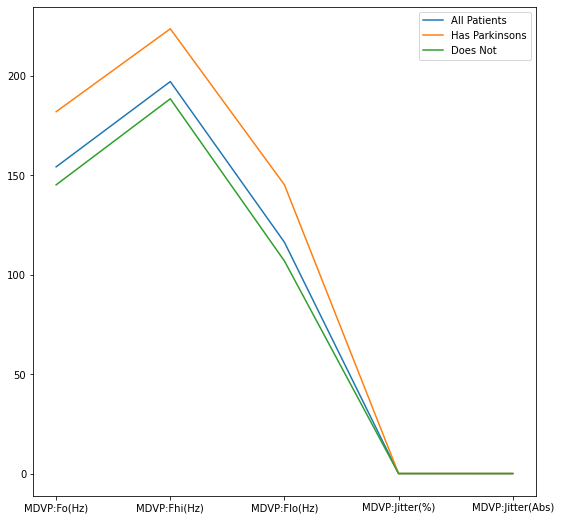

In [4]:
#Feature Averages Plots
nores_df=df.drop(columns=['status'])
nores_mean=nores_df.mean()
plt.figure(figsize=(9,9))
plt.plot(nores_mean[:5],label="All Patients")
plt.plot(group_df.iloc[0][:5],label="Has Parkinsons")
plt.plot(group_df.iloc[1][:5],label="Does Not")
plt.legend()

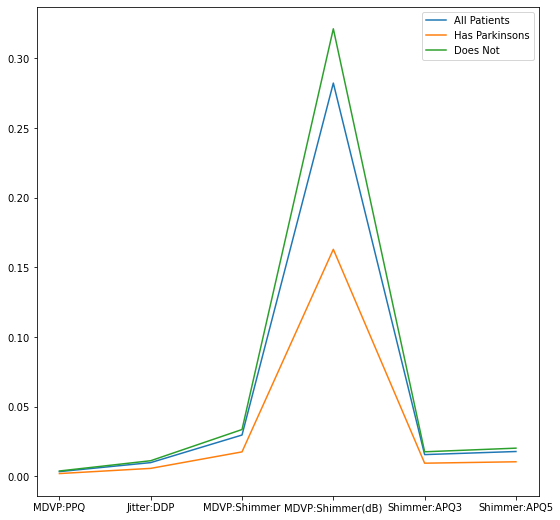

In [5]:
plt.figure(figsize=(9,9))
plt.plot(nores_mean[6:12],label="All Patients")
plt.plot(group_df.iloc[0][6:12],label="Has Parkinsons")
plt.plot(group_df.iloc[1][6:12],label="Does Not")
plt.legend()

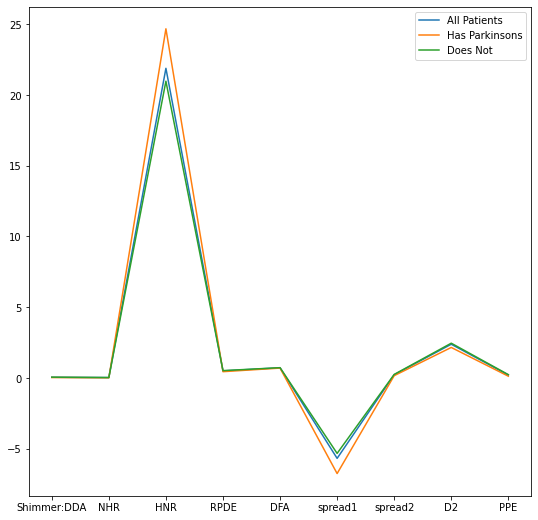

In [6]:
plt.figure(figsize=(9,9))
plt.plot(nores_mean[13:22],label="All Patients")
plt.plot(group_df.iloc[0][13:22],label="Has Parkinsons")
plt.plot(group_df.iloc[1][13:22],label="Does Not")
plt.legend()

In [7]:
#Get the correllation for all columns and display
nores_df=df.drop(columns=['status'])
print('Correlation:\n',nores_df.corrwith(park))

Correlation:
 MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
dtype: float64


In [8]:
#Take absolute value and sort correllations highest to lowest
print('Correlation Absolute Values Sorted:\n',nores_df.corrwith(park).abs().sort_values(ascending=False))

Correlation Absolute Values Sorted:
 spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
dtype: float64


Text(0.5, 1.0, 'Correlation Matrix')

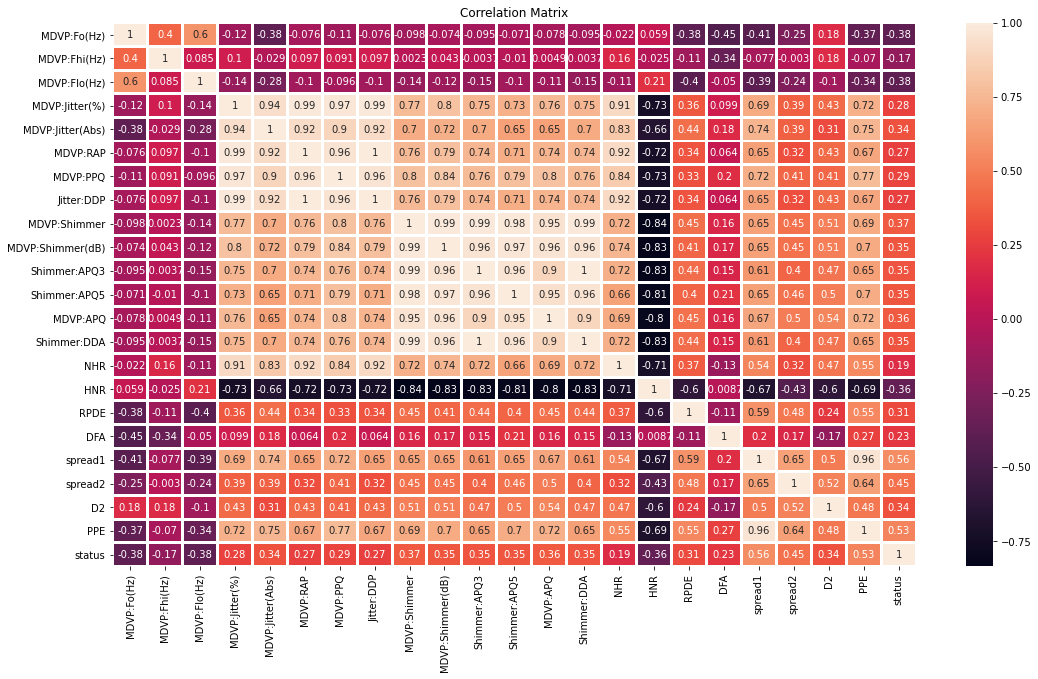

In [9]:
#Make correllation heatmap
import seaborn as sns
corr_matrix=df.corr()
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix,linewidths=2.0,ax=ax,annot=True)
ax.set_title('Correlation Matrix')

In [10]:
#Drop all columns except the 5 most correlative
corr_df=df[['spread1','PPE','spread2','MDVP:Fo(Hz)','MDVP:Flo(Hz)']]
corr_df.head()

,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz)
0,-4.813031,0.284654,0.266482,119.992,74.997
1,-4.075192,0.368674,0.335590,122.400,113.819
2,-4.443179,0.332634,0.311173,116.682,111.555
3,-4.117501,0.368975,0.334147,116.676,111.366
4,-3.747787,0.410335,0.234513,116.014,110.655


In [11]:
#Split data 80% training 20% test
X_train, X_test, y_train, y_test = train_test_split(nores_df, park, test_size=0.20)

In [12]:
#Train decision tree and check its accuracy with training data
dectree=DecisionTreeClassifier().fit(X_train,y_train)
dectree_pred = cross_val_predict(dectree, X_train,y_train, cv=5)
dectree_score = cross_val_score(dectree,X_train,y_train,cv=5)
dectree_avg = np.mean(dectree_score)
dectree_acc=accuracy_score(y_train,dectree_pred)
dectree_prec=precision_score(y_train,dectree_pred)
dectree_rec=recall_score(y_train,dectree_pred)
print('Decision Tree Accuracy:',dectree_acc)
print('Decision Tree Precision:',dectree_prec)
print('Decision Tree Recall:',dectree_rec)

Decision Tree Accuracy: 0.8653846153846154
Decision Tree Precision: 0.8991596638655462
Decision Tree Recall: 0.9224137931034483


In [13]:
#Train random forest and check its accuracy with training data
rantree=RandomForestClassifier().fit(X_train,y_train)
rantree_pred = cross_val_predict(rantree, X_train,y_train, cv=5)
rantree_score = cross_val_score(rantree,X_train,y_train,cv=5)
rantree_avg = np.mean(rantree_score)
rantree_acc=accuracy_score(y_train,rantree_pred)
rantree_prec=precision_score(y_train,rantree_pred)
rantree_rec=recall_score(y_train,rantree_pred)
print('Random Forest Accuracy:',rantree_acc)
print('Random Forest Precision:',rantree_prec)
print('Random Forest Recall:',rantree_rec)

Random Forest Accuracy: 0.9038461538461539
Random Forest Precision: 0.9105691056910569
Random Forest Recall: 0.9655172413793104


In [14]:
#Train multilayer perceptron and check its accuracy with training data
mlp=MLPClassifier().fit(X_train,y_train)
mlp_pred = cross_val_predict(mlp, X_train,y_train, cv=5)
mlp_score = cross_val_score(mlp,X_train,y_train,cv=5)
mlp_avg = np.mean(mlp_score)
mlp_acc=accuracy_score(y_train,mlp_pred)
mlp_prec=precision_score(y_train,mlp_pred)
mlp_rec=recall_score(y_train,mlp_pred)
print('Multilayer Perceptron Accuracy:',mlp_acc)
print('Multilayer Perceptron Precision:',mlp_prec)
print('Multilayer Perceptron Recall:',mlp_rec)

Multilayer Perceptron Accuracy: 0.8205128205128205
Multilayer Perceptron Precision: 0.8098591549295775
Multilayer Perceptron Recall: 0.9913793103448276


In [15]:
#Use algorithms to predict using test data and display accuracy
display(dectree.score(X_test,y_test))
display(rantree.score(X_test,y_test))
display(mlp.score(X_test,y_test))

0.8974358974358975

0.9230769230769231

0.6923076923076923

In [16]:
dectree_pred=dectree.predict(X_test)
dectree_act=y_test
confusion_matrix(dectree_act, dectree_pred)

array([[ 5,  3],
       [ 1, 30]], dtype=int64)

In [17]:
rantree_pred=rantree.predict(X_test)
rantree_act=y_test
confusion_matrix(rantree_act, rantree_pred)

array([[ 5,  3],
       [ 0, 31]], dtype=int64)

In [18]:
mlp_pred=mlp.predict(X_test)
mlp_act=y_test
confusion_matrix(mlp_act, mlp_pred)

array([[ 1,  7],
       [ 5, 26]], dtype=int64)